Name - Arshpreet Singh, n
Will an Online Shopper Make a Purchase?

Part1 - Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("online_shoppers_intention.csv")



In [2]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Preparing Data

In [4]:
df.drop('Administrative_Duration', axis=1, inplace=True)
df.drop('Informational_Duration', axis=1, inplace=True)
df.drop('ProductRelated_Duration', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('VisitorType', axis=1, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  int64  
 1   Informational     12330 non-null  int64  
 2   ProductRelated    12330 non-null  int64  
 3   BounceRates       12330 non-null  float64
 4   ExitRates         12330 non-null  float64
 5   PageValues        12330 non-null  float64
 6   SpecialDay        12330 non-null  float64
 7   OperatingSystems  12330 non-null  int64  
 8   Browser           12330 non-null  int64  
 9   Region            12330 non-null  int64  
 10  TrafficType       12330 non-null  int64  
 11  Weekend           12330 non-null  bool   
 12  Revenue           12330 non-null  bool   
dtypes: bool(2), float64(4), int64(7)
memory usage: 1.1 MB


In [6]:
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)
df.dropna(axis=0, inplace=True)

C:\Users\Arshpreet Singh\AppData\Local\Temp\ipykernel_1268\134100877.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(True, 1, inplace=True)


In [7]:
df.head(20)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,0,1,0.200000,0.200000,0.0,0.0,1,1,1,1,0,0
1,0,0,2,0.000000,0.100000,0.0,0.0,2,2,1,2,0,0
2,0,0,1,0.200000,0.200000,0.0,0.0,4,1,9,3,0,0
3,0,0,2,0.050000,0.140000,0.0,0.0,3,2,2,4,0,0
4,0,0,10,0.020000,0.050000,0.0,0.0,3,3,1,4,1,0
5,0,0,19,0.015789,0.024561,0.0,0.0,2,2,1,3,0,0
6,0,0,1,0.200000,0.200000,0.0,0.4,2,4,3,3,0,0
7,1,0,0,0.200000,0.200000,0.0,0.0,1,2,1,5,1,0
8,0,0,2,0.000000,0.100000,0.0,0.8,2,2,2,3,0,0
9,0,0,3,0.000000,0.022222,0.0,0.4,2,4,1,2,0,0


Text(0.5, 1.0, 'Purchase Distribution')

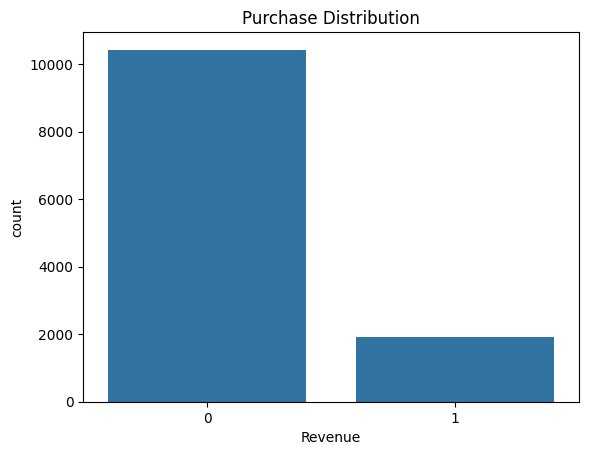

In [8]:
sns.countplot(x='Revenue', data=df)
plt.title('Purchase Distribution')

Text(0.5, 1.0, 'PageValues and Revenue')

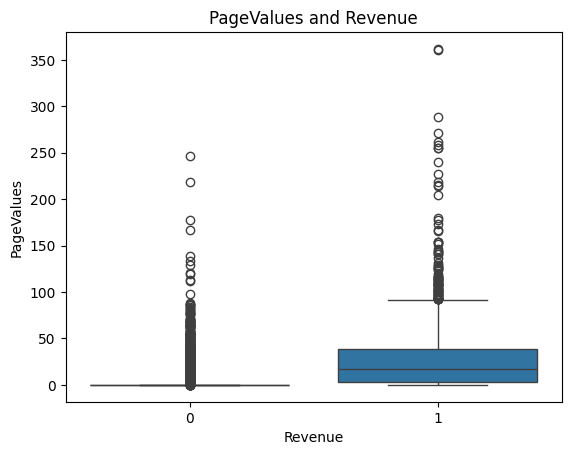

In [9]:
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('PageValues and Revenue')

Text(0.5, 1.0, 'BounceRates and Revenue')

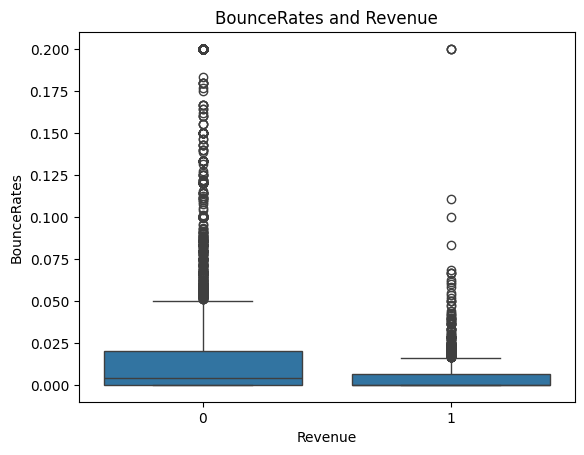

In [10]:
sns.boxplot(x='Revenue', y='BounceRates', data=df)
plt.title('BounceRates and Revenue')

Text(0.5, 1.0, 'ExitRates and Revenue')

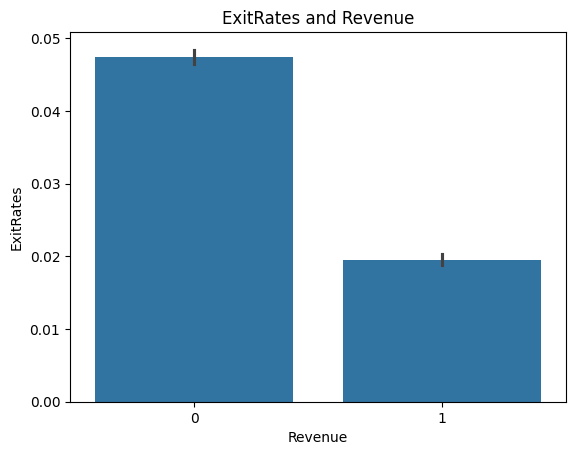

In [11]:
sns.barplot(x='Revenue', y='ExitRates', data=df)
plt.title('ExitRates and Revenue')

Text(0.5, 1.0, 'Weekend Visits and Revenue')

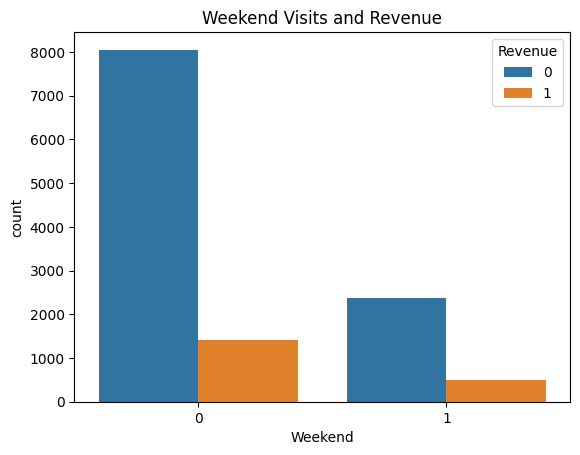

In [12]:
sns.countplot(x='Weekend', hue='Revenue', data=df)
plt.title('Weekend Visits and Revenue')

Choosing and training the model

In [13]:
X = df.drop('Revenue', axis=1)
y = df['Revenue'].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=88
)


In [15]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3118
           1       0.75      0.38      0.50       581

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.87      0.88      0.87      3699



In [16]:
logmodel.score(X_test, y_test)

0.8824006488240065

In [17]:
X.head()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0,0,1,0.20,0.20,0.0,0.0,1,1,1,1,0
1,0,0,2,0.00,0.10,0.0,0.0,2,2,1,2,0
2,0,0,1,0.20,0.20,0.0,0.0,4,1,9,3,0
3,0,0,2,0.05,0.14,0.0,0.0,3,2,2,4,0
4,0,0,10,0.02,0.05,0.0,0.0,3,3,1,4,1


In [ ]:
customer = {
    'Administrative': [3],
    'Informational': [2],
    'ProductRelated': [60],     
    'BounceRates': [0.001],
    'ExitRates': [0.005],
    'PageValues': [80.0],        
    'SpecialDay': [0.0],
    'OperatingSystems': [2],
    'Browser': [1],
    'Region': [3],
    'TrafficType': [2],
    'Weekend': [1]
}

buy_df = pd.DataFrame(customer)

prediction = logmodel.predict(buy_df)
print(prediction)

[1]
